In [7]:
# -- IMPORTS -- #
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image as kerasImage
from keras.models import Model
from os import listdir
from os.path import isfile, join
%matplotlib inline
import keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
import os

In [8]:
# -- DEFINE FUNCTIONS -- #
def deprocess_image(x):    
    x -= x.mean(); x /= (x.std() + K.epsilon()); x *= 0.25
    # CLIP DATA
    x += 0.5; x = np.clip(x, 0, 1)
    # CONVERT TO RGB
    x *= 255; x = np.clip(x, 0, 255).astype('uint8')
    return x

In [9]:
# -- VARIABLES FOR VISUALIZATION -- #
reservedFiles = ['.DS_Store']
size = (224,224)
layerNames = []
layerOutputs = []
imgTest = []
model = VGG16(weights='imagenet',include_top=True)
dataDirectory = './Data/images/'
for im in listdir(dataDirectory):
    if isfile(join(dataDirectory, im)) and im not in reservedFiles:
        imgTest.append(join(dataDirectory,im))
for layer in model.layers:
    if layer.__class__.__name__ == 'Conv2D':
        layerOutputs.append(layer.output)
        layerNames.append(layer.name)
visual = Model(inputs=model.input,outputs=layerOutputs)
for out,k in zip(layerOutputs,range(len(layerOutputs))):
    print('Layer_'+layerNames[k]+':'+str(out.shape[3]))

Layer_block1_conv1:64
Layer_block1_conv2:64
Layer_block2_conv1:128
Layer_block2_conv2:128
Layer_block3_conv1:256
Layer_block3_conv2:256
Layer_block3_conv3:256
Layer_block4_conv1:512
Layer_block4_conv2:512
Layer_block4_conv3:512
Layer_block5_conv1:512
Layer_block5_conv2:512
Layer_block5_conv3:512


Select from (0-114): 45


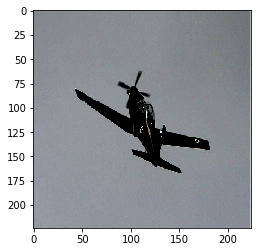

In [12]:
# -- VISUALIZATION OF ALL ACTIVATIONS GIVEN A IMAGE -- #
if not os.path.isdir('./Results/Activations'):
    os.mkdir('./Results/Activations')

# -- DEFINE VARIABLES -- # 
numSelect = int(input('Select from (0-{0}):'.format(len(imgTest)-1)))
imageInput = kerasImage.load_img(imgTest[numSelect],target_size=size)
array = kerasImage.img_to_array(imageInput)
plt.imshow(deprocess_image(array.copy()))
plt.show()
array = np.expand_dims(array,axis=0)
array = preprocess_input(array)
cols = 32

In [13]:
# -- PREDICT IMAGE -- #
activations = visual.predict(array)

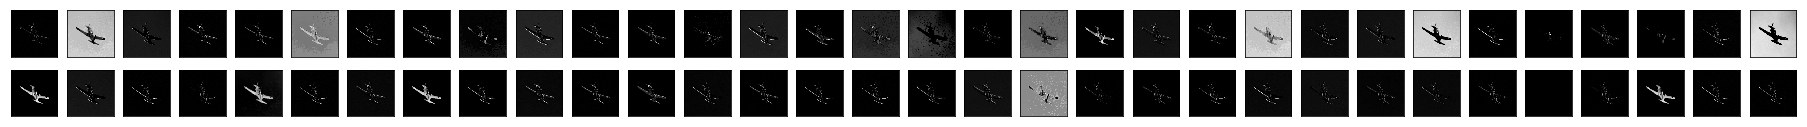

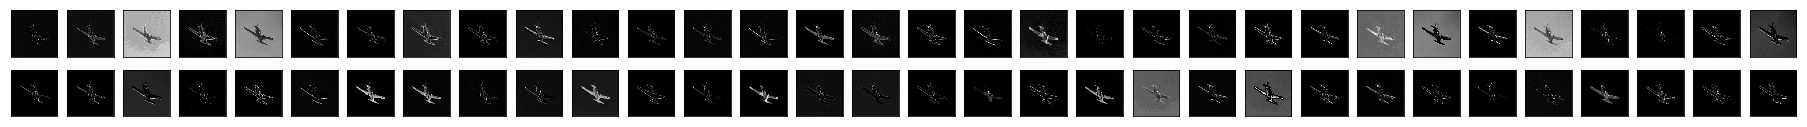

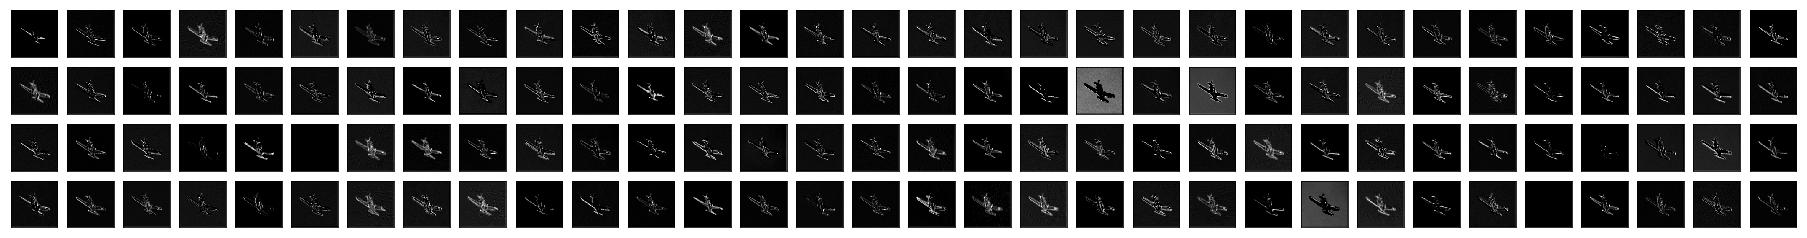

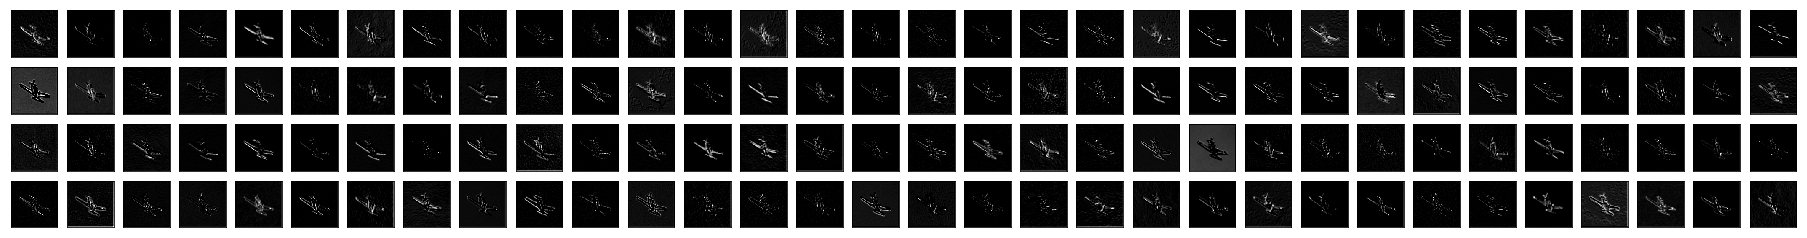

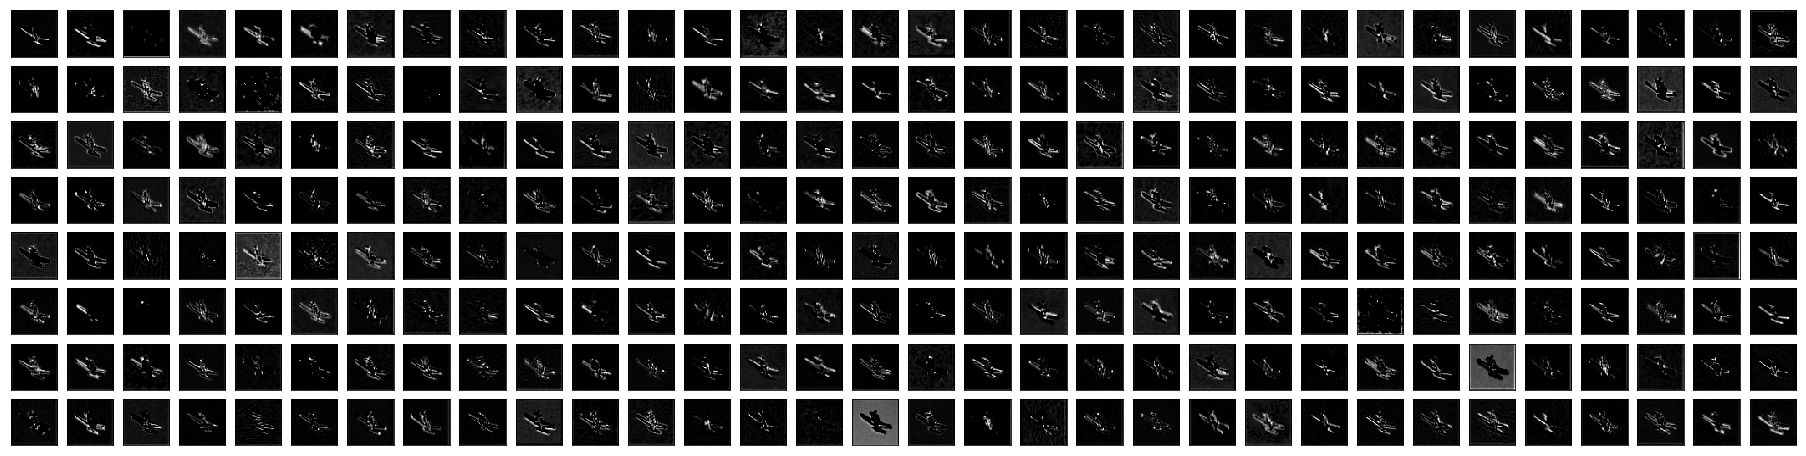

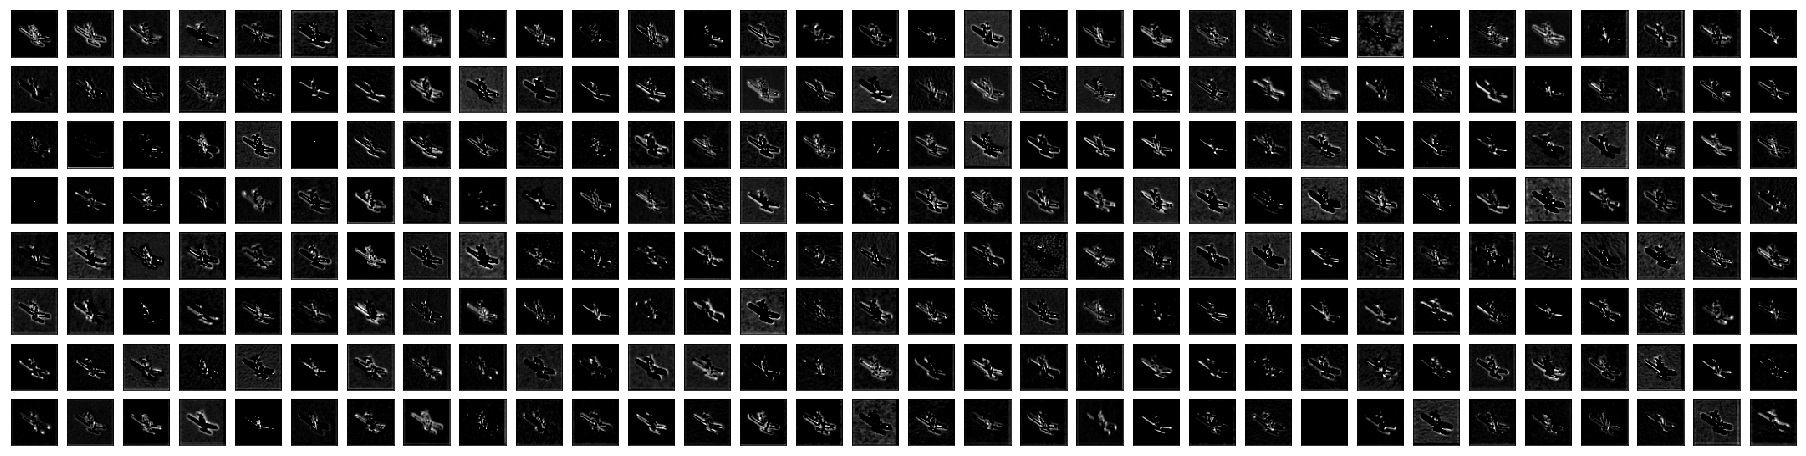

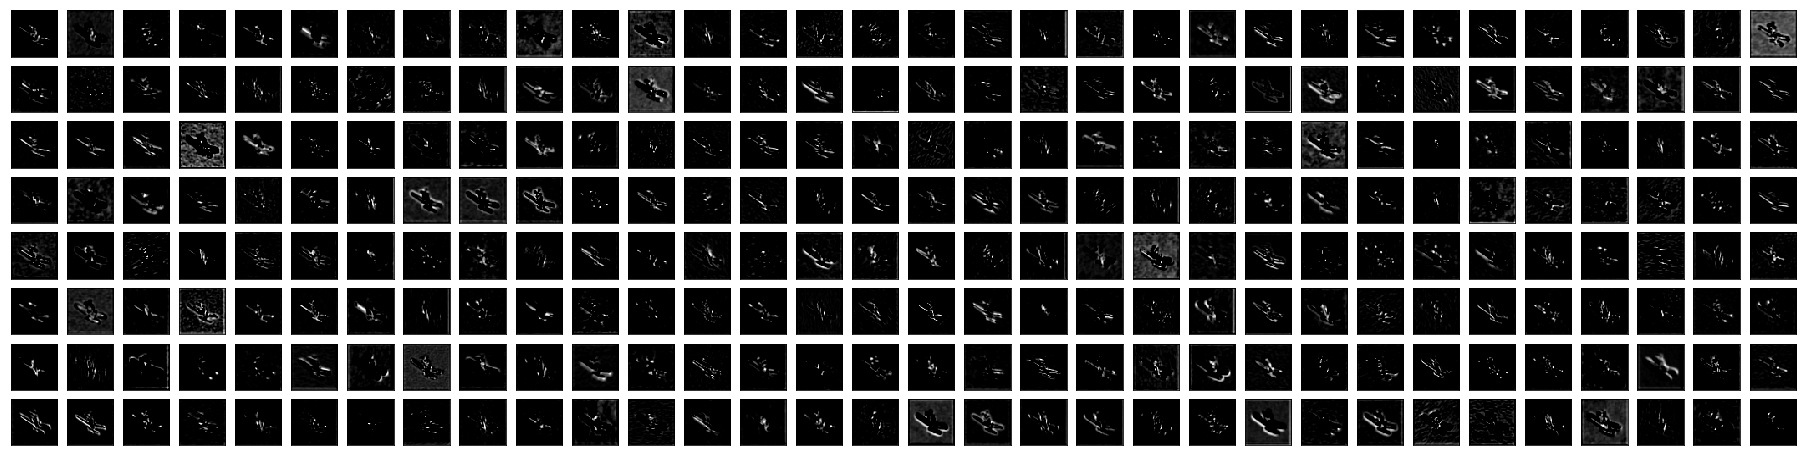

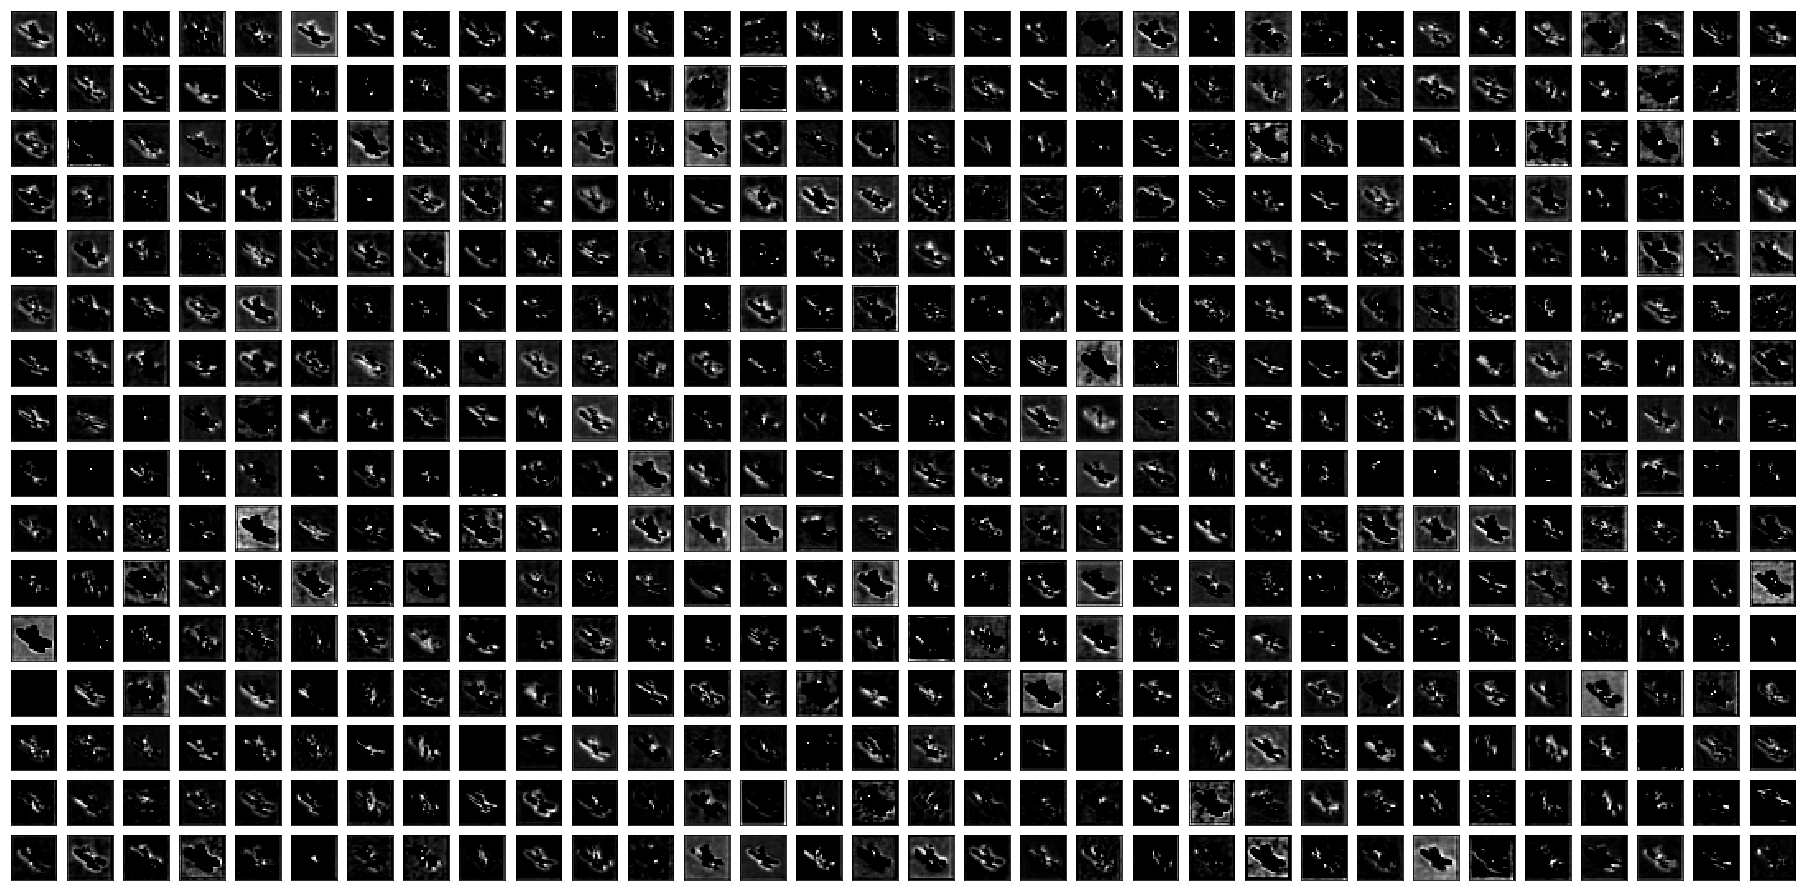

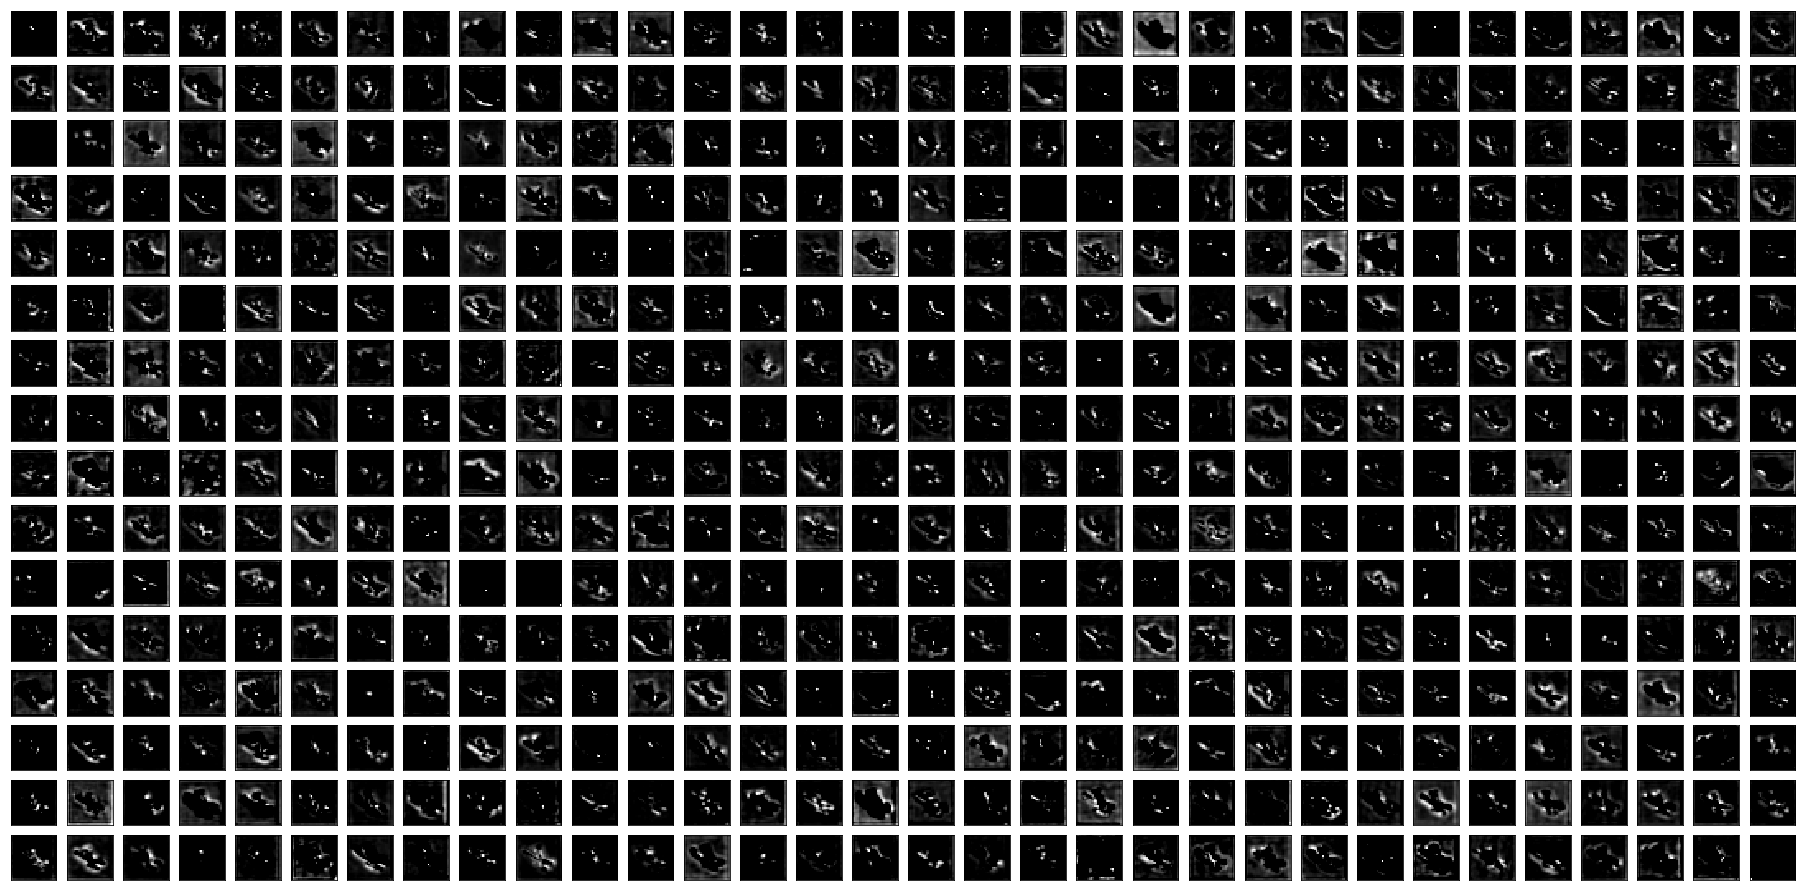

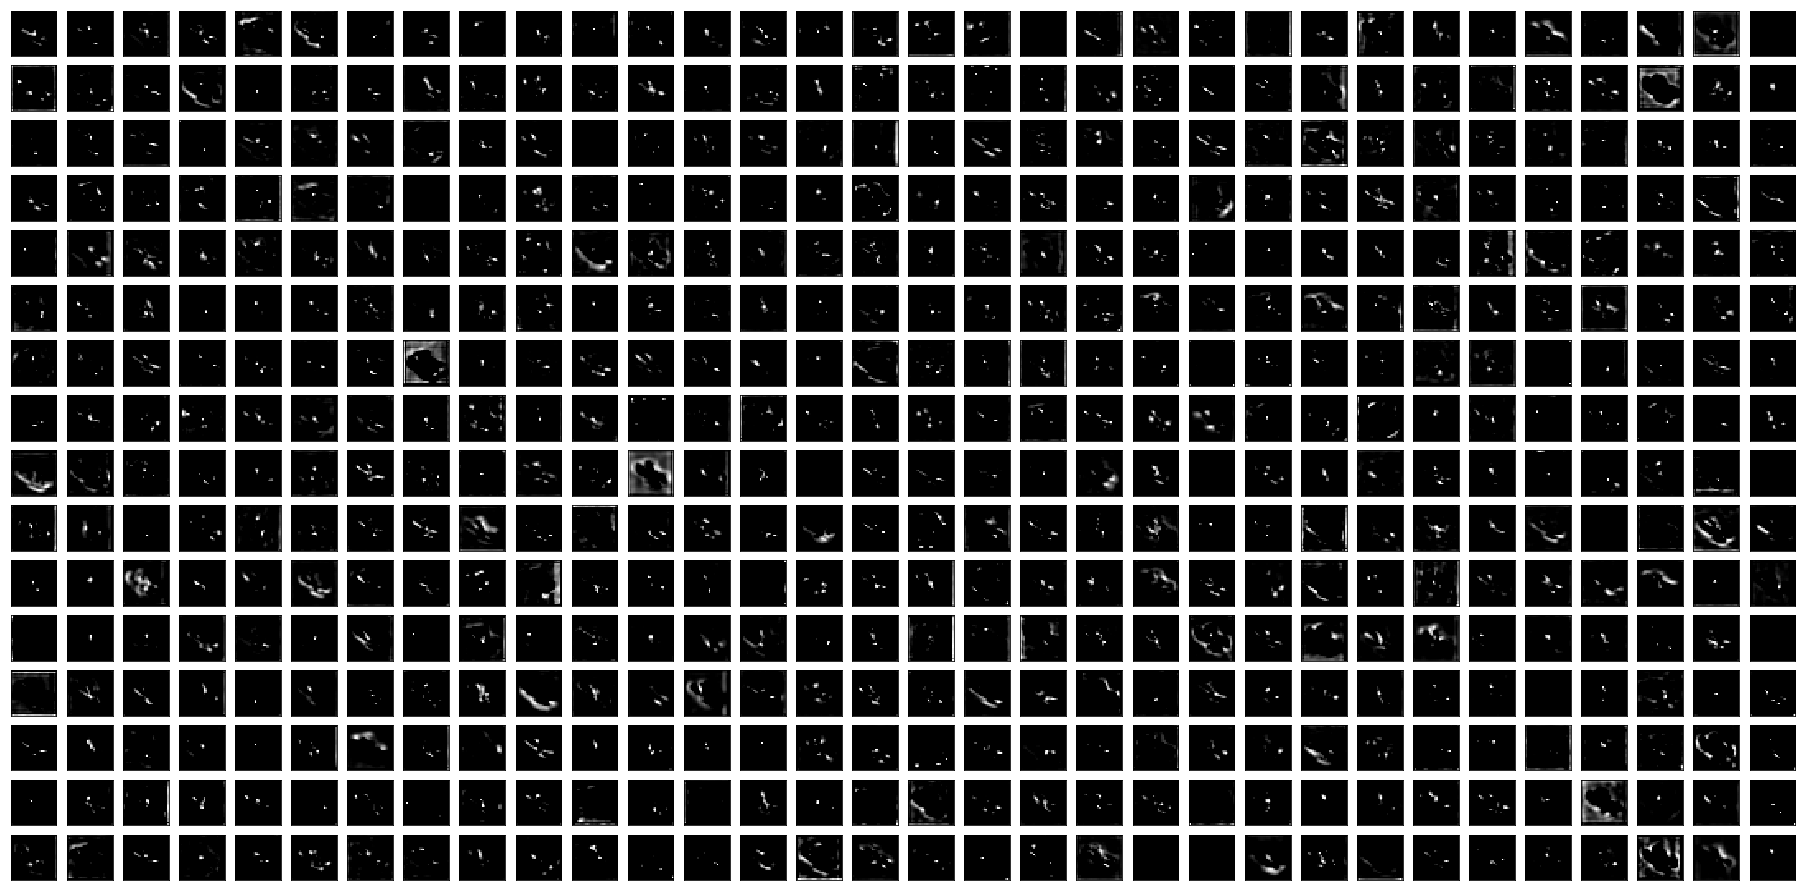

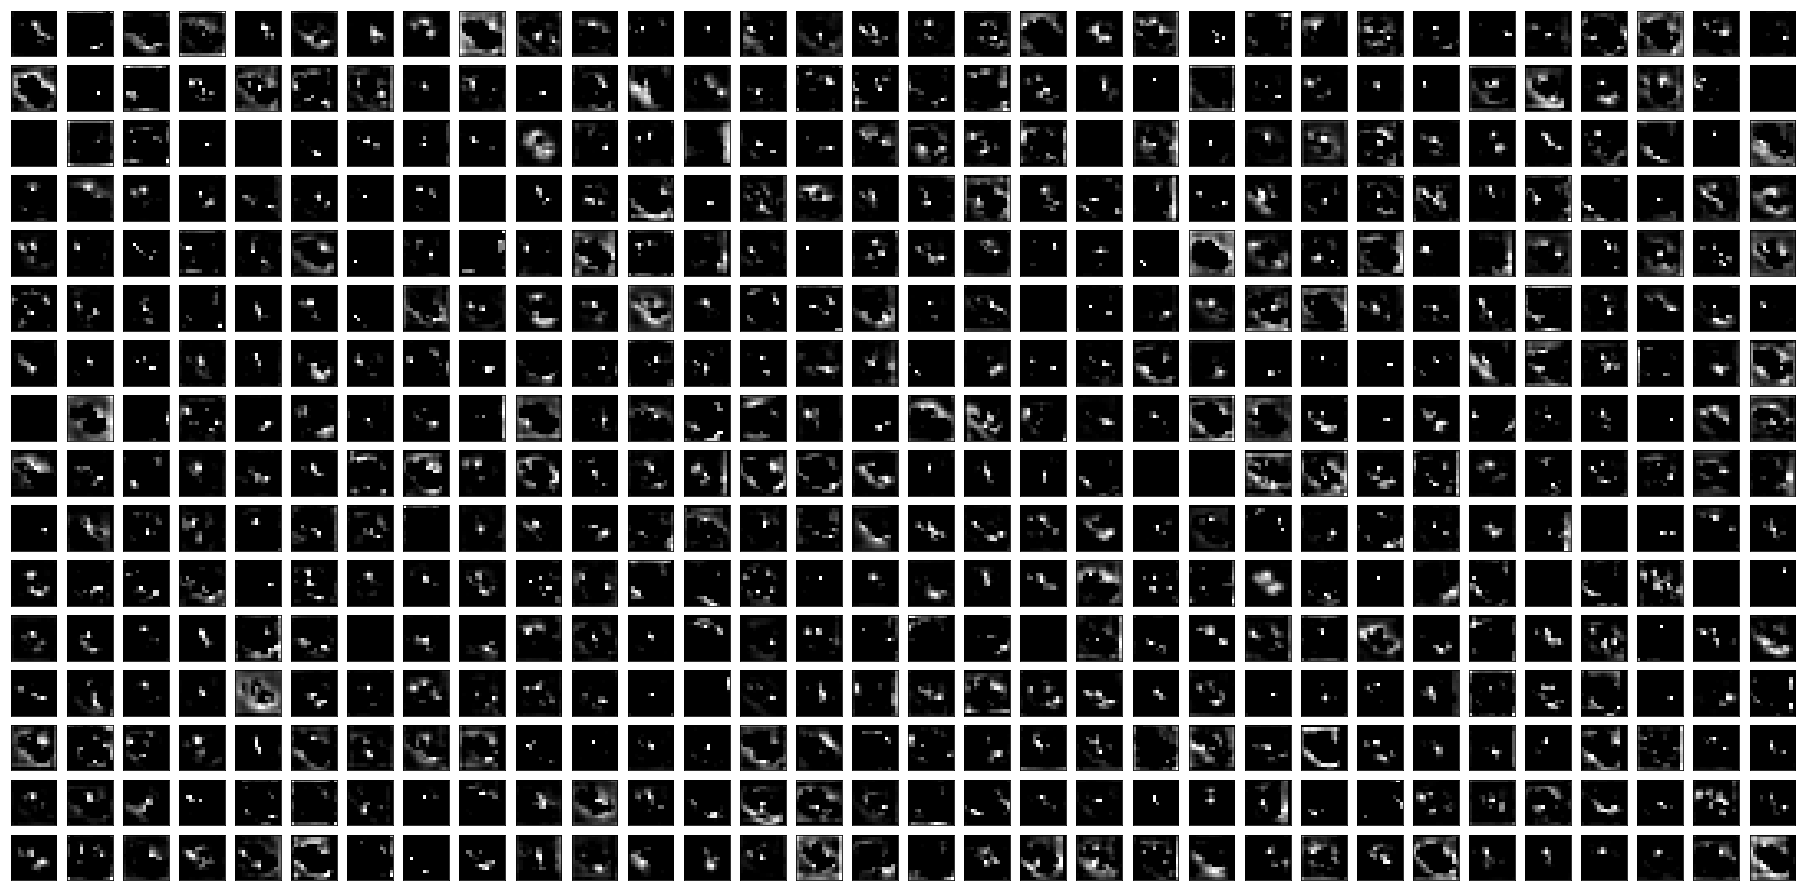

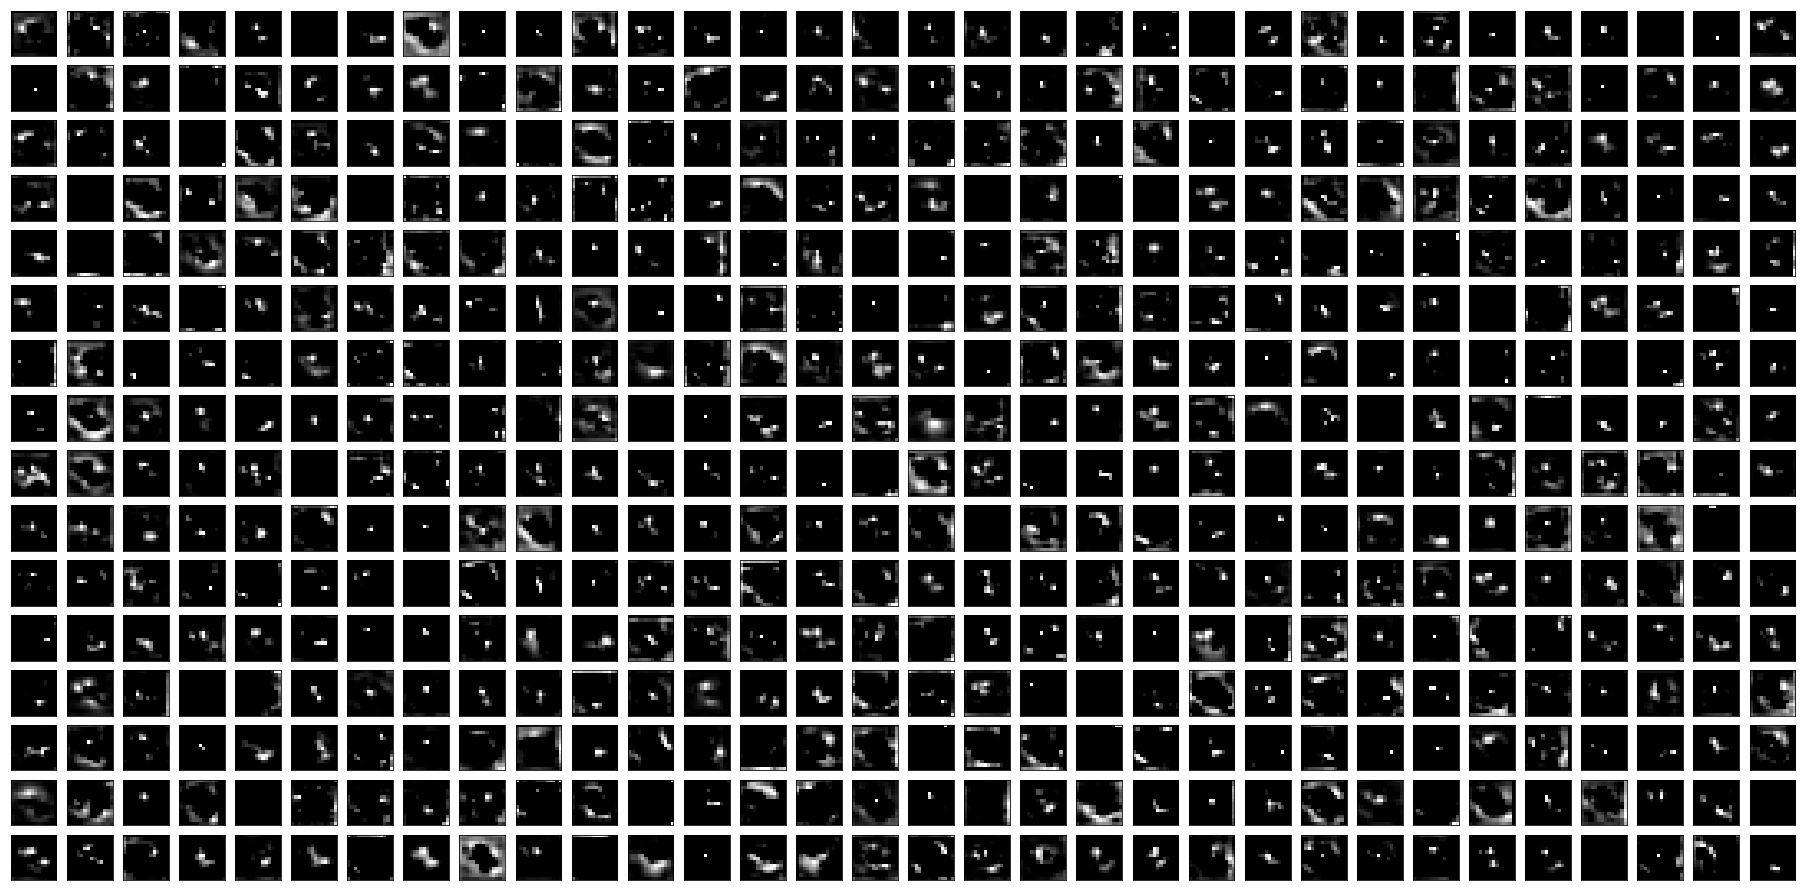

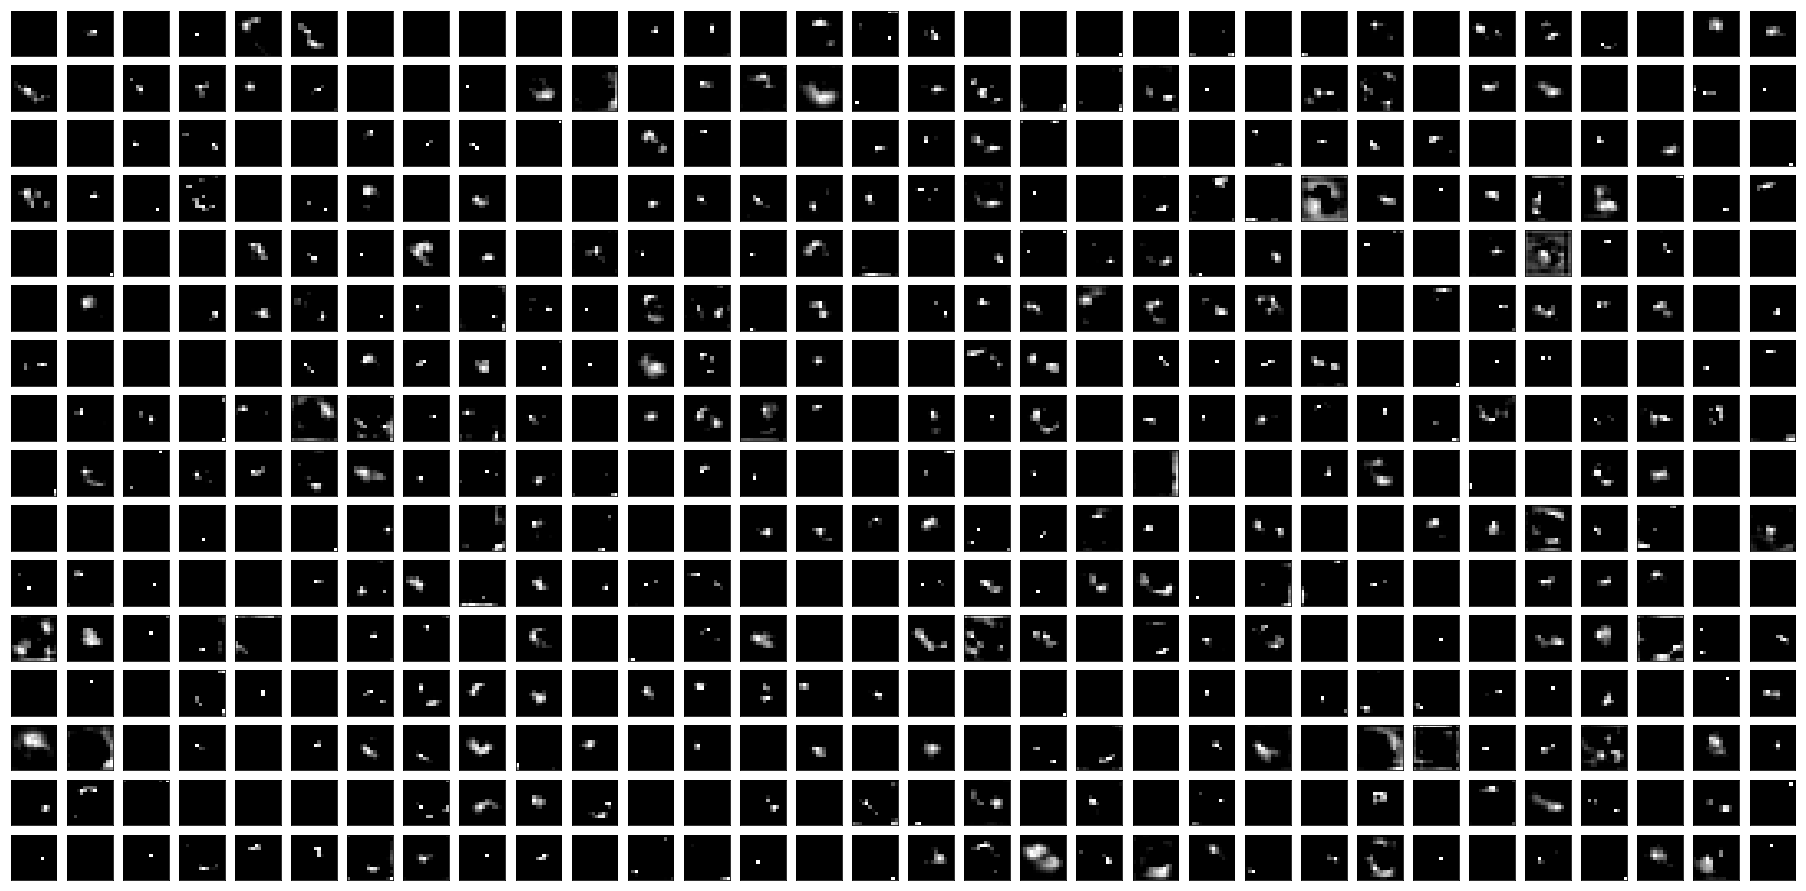

In [14]:
# -- SEE ACTIVATIONS -- #
for n,act in zip(range(len(activations)),activations):
    numFilters = act.shape[-1]; size = act.shape[1]
    rows = numFilters // cols
    fig = plt.figure(figsize=(cols,rows))
    for k in range(0,cols*rows):
        image = act[0,:,:,k]
        image = (image-np.min(image))/(np.max(image)-np.min(image)+K.epsilon())
        fig.add_subplot(rows,cols,k+1)
        plt.imshow(image,cmap=plt.cm.gray)
        plt.xticks([]); plt.yticks([])
    fileName = './Results/Activations/IMNE_'+layerNames[n]+'.png'
    fig.savefig(fileName,dpi=250)

In [ ]:
fmap = int(input('Select desired feature map. From (0-{0})'.format(layerOutputs[-1].shape[3]-1)))
print(activations[len(layerOutputs)-1][0,:,:,fmap])